In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from models import kNN, sNN, ggNN

/home/josegfer/miniconda3/envs/lusiadas/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
H_train = torch.load('data/H_train.pt')
y_train = torch.load('data/y_train.pt')
yhat_train = torch.load('data/yhat_train.pt')
s_train = torch.load('data/s_train.pt')

H_test = torch.load('data/H_test.pt')
y_test = torch.load('data/y_test.pt')
yhat_test = torch.load('data/yhat_test.pt')
s_test = torch.load('data/s_test.pt')

In [4]:
model = kNN(k = 5)
model.fit(H_train, y_train)
q_knn = model.q(H_test, y_test)

100%|██████████| 10000/10000 [00:43<00:00, 228.72it/s]


In [4]:
model = sNN(tau = 5)
model.fit(H_train, y_train)
q_snn = model.q(H_test, y_test)

100%|██████████| 10000/10000 [02:22<00:00, 70.30it/s]


In [3]:
model = ggNN()
model.fit(H_train, y_train)
q_ggnn = model.q(H_test, y_test)

100%|██████████| 10000/10000 [00:16<00:00, 623.01it/s]


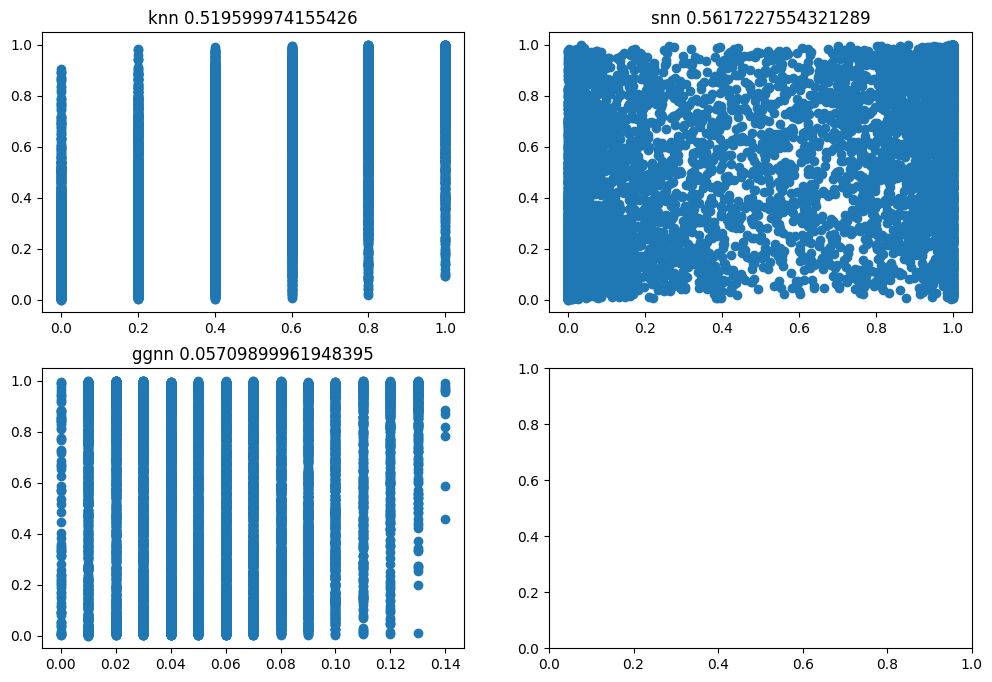

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].scatter(q_knn, s_test);
axes[0, 0].title.set_text('knn {}'.format(torch.mean(q_knn)));
axes[0, 1].scatter(q_snn, s_test);
axes[0, 1].title.set_text('snn {}'.format(torch.mean(q_snn)));
axes[1, 0].scatter(q_ggnn, s_test);
axes[1, 0].title.set_text('ggnn {}'.format(torch.mean(q_ggnn)));